# ÁôåÁóáËØäÊñ≠ÂàÜÁ±ªÔºöKËøëÈÇªÂàÜÁ±ªÂô®

**‰ΩúËÄÖ**: C.C.

‰ΩøÁî®Â®ÅÊñØÂ∫∑ÊòüÂ∑û‰π≥ËÖ∫ËÇøÁò§Êï∞ÊçÆÈõÜËÆ≠ÁªÉKËøëÈÇªÂàÜÁ±ªÂô®Êù•È¢ÑÊµãËÇøÁò§ÊòØÊÅ∂ÊÄßËøòÊòØËâØÊÄß„ÄÇ

## Êï∞ÊçÆÈõÜ‰ø°ÊÅØ
- **Êï∞ÊçÆÈõÜ**: Â®ÅÊñØÂ∫∑ÊòüÂ∑û‰π≥ËÖ∫ËÇøÁò§Êï∞ÊçÆÈõÜ (Wisconsin Breast Cancer Dataset)
- **ÁõÆÊ†á**: È¢ÑÊµãËÇøÁò§ÊòØÊÅ∂ÊÄß(M)ËøòÊòØËâØÊÄß(B)
- **ÁâπÂæÅ**: 30‰∏™Êï∞ÂÄºÁâπÂæÅÔºåÂåÖÊã¨ÂçäÂæÑ„ÄÅÁ∫πÁêÜ„ÄÅÂë®Èïø„ÄÅÈù¢ÁßØÁ≠â


In [23]:
# ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

print("Â∫ìÂØºÂÖ•ÂÆåÊàêÔºÅ")


Â∫ìÂØºÂÖ•ÂÆåÊàêÔºÅ


In [24]:
# 1. Êï∞ÊçÆÂä†ËΩΩÂíåÊé¢Á¥¢
print("=== Êï∞ÊçÆÂä†ËΩΩÂíåÂü∫Êú¨‰ø°ÊÅØ ===")
df = pd.read_csv('bc_data.csv')

print(f"Êï∞ÊçÆÈõÜÂΩ¢Áä∂: {df.shape}")
print(f"ÂàóÂêç: {list(df.columns)}")
print("\nÂâç5Ë°åÊï∞ÊçÆ:")
print(df.head())

print("\nÊï∞ÊçÆÁ±ªÂûã:")
print(df.dtypes)

print("\nÁº∫Â§±ÂÄºÁªüËÆ°:")
print(df.isnull().sum().sum())

print("\nÁõÆÊ†áÂèòÈáèÂàÜÂ∏É:")
print(df['diagnosis'].value_counts())
print(f"ÊÅ∂ÊÄßÊØî‰æã: {df['diagnosis'].value_counts()['M'] / len(df) * 100:.2f}%")
print(f"ËâØÊÄßÊØî‰æã: {df['diagnosis'].value_counts()['B'] / len(df) * 100:.2f}%")


=== Êï∞ÊçÆÂä†ËΩΩÂíåÂü∫Êú¨‰ø°ÊÅØ ===
Êï∞ÊçÆÈõÜÂΩ¢Áä∂: (569, 32)
ÂàóÂêç: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

Ââç5Ë°åÊï∞ÊçÆ:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.

=== Êï∞ÊçÆÂèØËßÜÂåñ ===


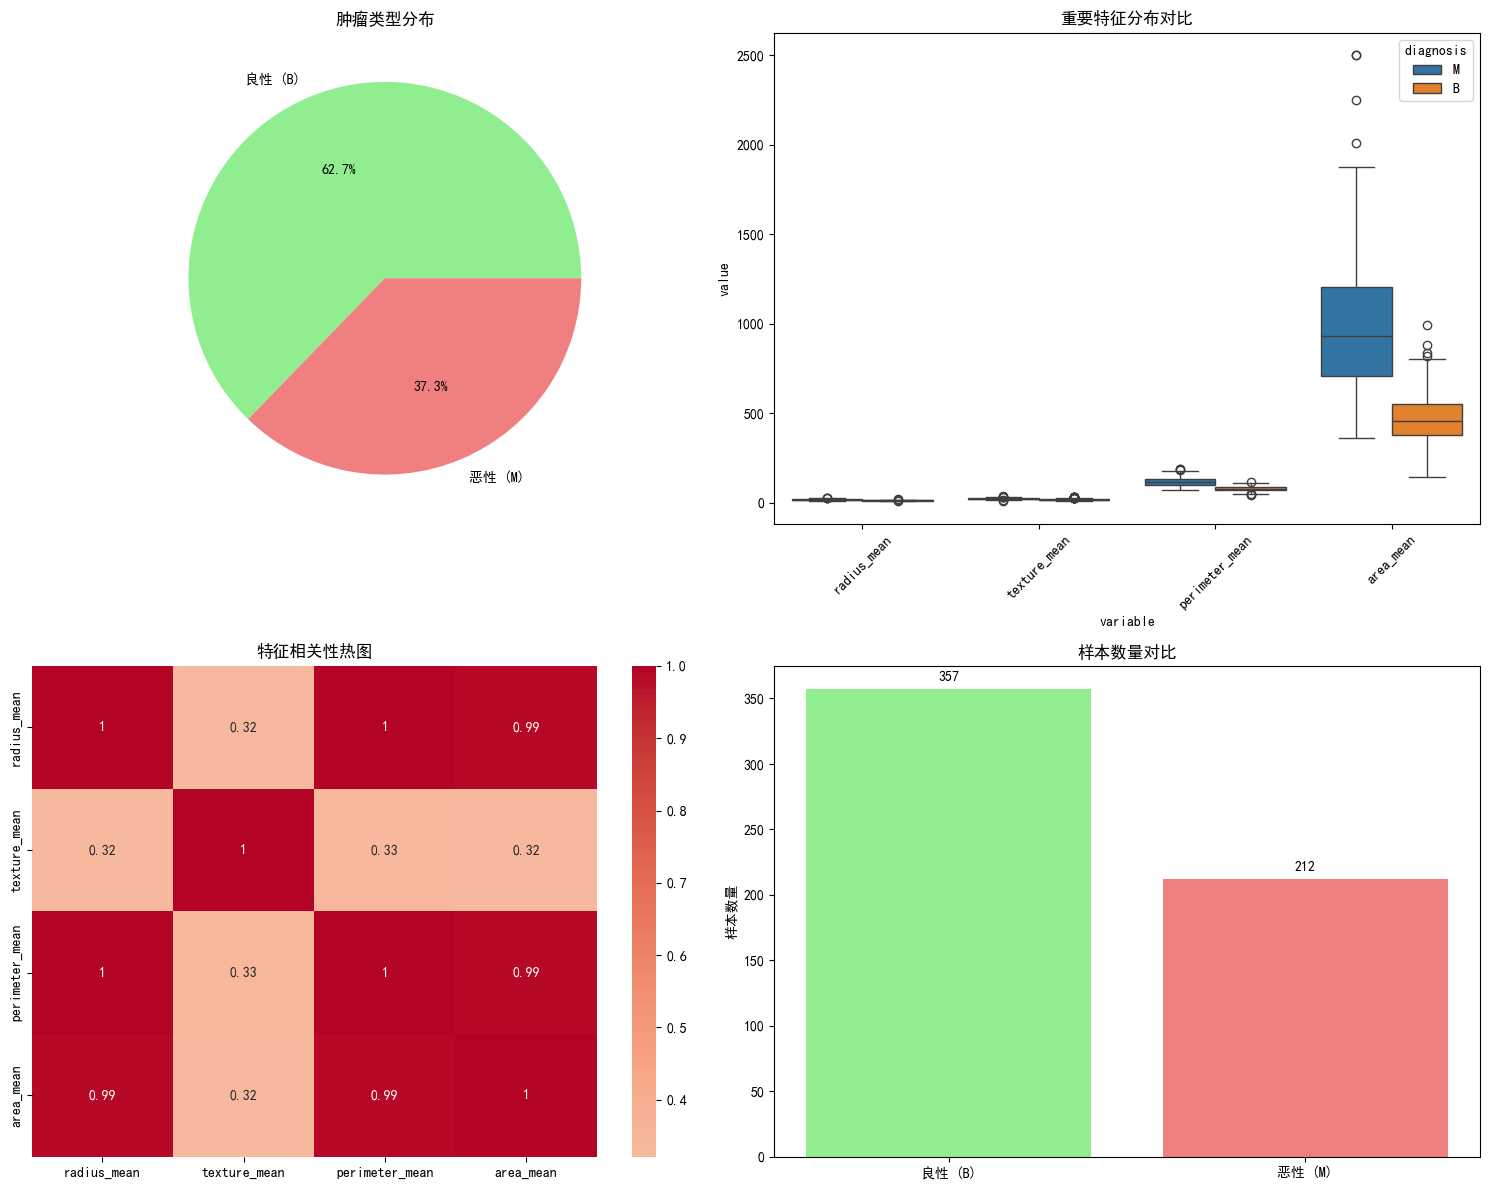

Êï∞ÊçÆÈõÜÂåÖÂê´ 569 ‰∏™Ê†∑Êú¨
ÂÖ∂‰∏≠ËâØÊÄßÊ†∑Êú¨: 357 ‰∏™
ÊÅ∂ÊÄßÊ†∑Êú¨: 212 ‰∏™
Êï∞ÊçÆÂèØËßÜÂåñÂõæÁâáÂ∑≤‰øùÂ≠ò‰∏∫: data_visualization.png


In [25]:
# 2. Êï∞ÊçÆÂèØËßÜÂåñ
print("=== Êï∞ÊçÆÂèØËßÜÂåñ ===")

# ÂàõÂª∫Â≠êÂõæ
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# ÁõÆÊ†áÂèòÈáèÂàÜÂ∏É
axes[0, 0].pie(df['diagnosis'].value_counts(), labels=['ËâØÊÄß (B)', 'ÊÅ∂ÊÄß (M)'], 
               autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
axes[0, 0].set_title('ËÇøÁò§Á±ªÂûãÂàÜÂ∏É')

# ÈÄâÊã©Âá†‰∏™ÈáçË¶ÅÁâπÂæÅËøõË°åÂèØËßÜÂåñ
important_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

# ÁâπÂæÅÂàÜÂ∏ÉÁÆ±Á∫øÂõæ
df_melted = df[important_features + ['diagnosis']].melt(id_vars=['diagnosis'], 
                                                       value_vars=important_features)
sns.boxplot(data=df_melted, x='variable', y='value', hue='diagnosis', ax=axes[0, 1])
axes[0, 1].set_title('ÈáçË¶ÅÁâπÂæÅÂàÜÂ∏ÉÂØπÊØî')
axes[0, 1].tick_params(axis='x', rotation=45)

# ÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÁÉ≠Âõæ
correlation_matrix = df[important_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1, 0])
axes[1, 0].set_title('ÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÁÉ≠Âõæ')

# ÊÅ∂ÊÄßvsËâØÊÄßÊ†∑Êú¨Êï∞Èáè
diagnosis_counts = df['diagnosis'].value_counts()
axes[1, 1].bar(['ËâØÊÄß (B)', 'ÊÅ∂ÊÄß (M)'], diagnosis_counts.values, 
               color=['lightgreen', 'lightcoral'])
axes[1, 1].set_title('Ê†∑Êú¨Êï∞ÈáèÂØπÊØî')
axes[1, 1].set_ylabel('Ê†∑Êú¨Êï∞Èáè')

# Âú®Êü±Áä∂Âõæ‰∏äÊ∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
for i, v in enumerate(diagnosis_counts.values):
    axes[1, 1].text(i, v + 5, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('data_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Êï∞ÊçÆÈõÜÂåÖÂê´ {len(df)} ‰∏™Ê†∑Êú¨")
print(f"ÂÖ∂‰∏≠ËâØÊÄßÊ†∑Êú¨: {diagnosis_counts['B']} ‰∏™")
print(f"ÊÅ∂ÊÄßÊ†∑Êú¨: {diagnosis_counts['M']} ‰∏™")
print("Êï∞ÊçÆÂèØËßÜÂåñÂõæÁâáÂ∑≤‰øùÂ≠ò‰∏∫: data_visualization.png")


In [26]:
# 3. Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ
print("=== Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ ===")

# ÂáÜÂ§áÁâπÂæÅÂíåÁõÆÊ†áÂèòÈáè
# Âà†Èô§idÂàóÔºå‰øùÁïôÊâÄÊúâÊï∞ÂÄºÁâπÂæÅ
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

print(f"ÁâπÂæÅÁü©ÈòµÂΩ¢Áä∂: {X.shape}")
print(f"ÁõÆÊ†áÂèòÈáèÂΩ¢Áä∂: {y.shape}")

# Â∞ÜÁõÆÊ†áÂèòÈáèËΩ¨Êç¢‰∏∫Êï∞ÂÄº (B=0, M=1)
y_numeric = (y == 'M').astype(int)
print(f"ÁõÆÊ†áÂèòÈáèËΩ¨Êç¢Âêé: 0(ËâØÊÄß)={sum(y_numeric==0)}, 1(ÊÅ∂ÊÄß)={sum(y_numeric==1)}")

# Êï∞ÊçÆÂàÜÂâ≤Ôºö70%ËÆ≠ÁªÉÔºå30%ÊµãËØï
X_train, X_test, y_train, y_test = train_test_split(
    X, y_numeric, test_size=0.3, random_state=42, stratify=y_numeric
)

print(f"ËÆ≠ÁªÉÈõÜÂ§ßÂ∞è: {X_train.shape[0]} Ê†∑Êú¨")
print(f"ÊµãËØïÈõÜÂ§ßÂ∞è: {X_test.shape[0]} Ê†∑Êú¨")
print(f"ËÆ≠ÁªÉÈõÜ‰∏≠ÊÅ∂ÊÄßÊ†∑Êú¨ÊØî‰æã: {y_train.mean():.2%}")
print(f"ÊµãËØïÈõÜ‰∏≠ÊÅ∂ÊÄßÊ†∑Êú¨ÊØî‰æã: {y_test.mean():.2%}")

# ÁâπÂæÅÊ†áÂáÜÂåñ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("ÁâπÂæÅÊ†áÂáÜÂåñÂÆåÊàêÔºÅ")
print(f"Ê†áÂáÜÂåñÂêéËÆ≠ÁªÉÈõÜÂΩ¢Áä∂: {X_train_scaled.shape}")
print(f"Ê†áÂáÜÂåñÂêéÊµãËØïÈõÜÂΩ¢Áä∂: {X_test_scaled.shape}")


=== Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ ===
ÁâπÂæÅÁü©ÈòµÂΩ¢Áä∂: (569, 30)
ÁõÆÊ†áÂèòÈáèÂΩ¢Áä∂: (569,)
ÁõÆÊ†áÂèòÈáèËΩ¨Êç¢Âêé: 0(ËâØÊÄß)=357, 1(ÊÅ∂ÊÄß)=212
ËÆ≠ÁªÉÈõÜÂ§ßÂ∞è: 398 Ê†∑Êú¨
ÊµãËØïÈõÜÂ§ßÂ∞è: 171 Ê†∑Êú¨
ËÆ≠ÁªÉÈõÜ‰∏≠ÊÅ∂ÊÄßÊ†∑Êú¨ÊØî‰æã: 37.19%
ÊµãËØïÈõÜ‰∏≠ÊÅ∂ÊÄßÊ†∑Êú¨ÊØî‰æã: 37.43%
ÁâπÂæÅÊ†áÂáÜÂåñÂÆåÊàêÔºÅ
Ê†áÂáÜÂåñÂêéËÆ≠ÁªÉÈõÜÂΩ¢Áä∂: (398, 30)
Ê†áÂáÜÂåñÂêéÊµãËØïÈõÜÂΩ¢Áä∂: (171, 30)


In [27]:
# 4. KËøëÈÇªÊ®°ÂûãËÆ≠ÁªÉÂíåÂèÇÊï∞‰ºòÂåñ
print("=== KËøëÈÇªÊ®°ÂûãËÆ≠ÁªÉÂíåÂèÇÊï∞‰ºòÂåñ ===")

# ‰ΩøÁî®ÁΩëÊ†ºÊêúÁ¥¢ÊâæÂà∞ÊúÄ‰Ω≥KÂÄº
k_range = list(range(1, 31))
param_grid = {'n_neighbors': k_range}

# ÂàõÂª∫KNNÂàÜÁ±ªÂô®
knn = KNeighborsClassifier()

# ‰ΩøÁî®‰∫§ÂèâÈ™åËØÅËøõË°åÁΩëÊ†ºÊêúÁ¥¢
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print(f"ÊúÄ‰Ω≥KÂÄº: {grid_search.best_params_['n_neighbors']}")
print(f"ÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅÂáÜÁ°ÆÁéá: {grid_search.best_score_:.4f}")

# ‰ΩøÁî®ÊúÄ‰Ω≥ÂèÇÊï∞ËÆ≠ÁªÉÊúÄÁªàÊ®°Âûã
best_knn = grid_search.best_estimator_

# Âú®ÊµãËØïÈõÜ‰∏äËøõË°åÈ¢ÑÊµã
y_pred = best_knn.predict(X_test_scaled)
y_pred_proba = best_knn.predict_proba(X_test_scaled)[:, 1]

print(f"ÊµãËØïÈõÜÂáÜÁ°ÆÁéá: {accuracy_score(y_test, y_pred):.4f}")

# ‰∏çÂêåKÂÄºÁöÑÊÄßËÉΩÂØπÊØî
k_scores = []
for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_temp, X_train_scaled, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

print(f"KÂÄºËåÉÂõ¥: {min(k_range)} Âà∞ {max(k_range)}")
print(f"ÊúÄ‰Ω≥KÂÄº: {k_range[np.argmax(k_scores)]}")
print(f"ÊúÄÈ´òÂáÜÁ°ÆÁéá: {max(k_scores):.4f}")


=== KËøëÈÇªÊ®°ÂûãËÆ≠ÁªÉÂíåÂèÇÊï∞‰ºòÂåñ ===
ÊúÄ‰Ω≥KÂÄº: 5
ÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅÂáÜÁ°ÆÁéá: 0.9697
ÊµãËØïÈõÜÂáÜÁ°ÆÁéá: 0.9649
KÂÄºËåÉÂõ¥: 1 Âà∞ 30
ÊúÄ‰Ω≥KÂÄº: 5
ÊúÄÈ´òÂáÜÁ°ÆÁéá: 0.9697


In [28]:
# 5. Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞
print("=== Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞ ===")

# ËØ¶ÁªÜÂàÜÁ±ªÊä•Âëä
print("ÂàÜÁ±ªÊä•Âëä:")
print(classification_report(y_test, y_pred, target_names=['ËâØÊÄß (B)', 'ÊÅ∂ÊÄß (M)']))

# Ê∑∑Ê∑ÜÁü©Èòµ
cm = confusion_matrix(y_test, y_pred)
print(f"\nÊ∑∑Ê∑ÜÁü©Èòµ:")
print(f"ÁúüÈò¥ÊÄß(TN): {cm[0,0]}, ÂÅáÈò≥ÊÄß(FP): {cm[0,1]}")
print(f"ÂÅáÈò¥ÊÄß(FN): {cm[1,0]}, ÁúüÈò≥ÊÄß(TP): {cm[1,1]}")

# ËÆ°ÁÆóÂêÑÁßçÊåáÊ†á
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nÊÄßËÉΩÊåáÊ†á:")
print(f"ÂáÜÁ°ÆÁéá (Accuracy): {accuracy:.4f}")
print(f"Á≤æÁ°ÆÁéá (Precision): {precision:.4f}")
print(f"Âè¨ÂõûÁéá (Recall): {recall:.4f}")
print(f"ÁâπÂºÇÊÄß (Specificity): {specificity:.4f}")
print(f"F1ÂàÜÊï∞: {f1_score:.4f}")

# ‰∫§ÂèâÈ™åËØÅÂàÜÊï∞
cv_scores = cross_val_score(best_knn, X_train_scaled, y_train, cv=5)
print(f"\n5Êäò‰∫§ÂèâÈ™åËØÅÂàÜÊï∞: {cv_scores}")
print(f"‰∫§ÂèâÈ™åËØÅÂπ≥ÂùáÂàÜÊï∞: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


=== Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞ ===
ÂàÜÁ±ªÊä•Âëä:
              precision    recall  f1-score   support

      ËâØÊÄß (B)       0.95      1.00      0.97       107
      ÊÅ∂ÊÄß (M)       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171


Ê∑∑Ê∑ÜÁü©Èòµ:
ÁúüÈò¥ÊÄß(TN): 107, ÂÅáÈò≥ÊÄß(FP): 0
ÂÅáÈò¥ÊÄß(FN): 6, ÁúüÈò≥ÊÄß(TP): 58

ÊÄßËÉΩÊåáÊ†á:
ÂáÜÁ°ÆÁéá (Accuracy): 0.9649
Á≤æÁ°ÆÁéá (Precision): 1.0000
Âè¨ÂõûÁéá (Recall): 0.9062
ÁâπÂºÇÊÄß (Specificity): 1.0000
F1ÂàÜÊï∞: 0.9508

5Êäò‰∫§ÂèâÈ™åËØÅÂàÜÊï∞: [0.9875     0.9875     0.975      0.98734177 0.91139241]
‰∫§ÂèâÈ™åËØÅÂπ≥ÂùáÂàÜÊï∞: 0.9697 (+/- 0.0591)


=== ÁªìÊûúÂèØËßÜÂåñ ===


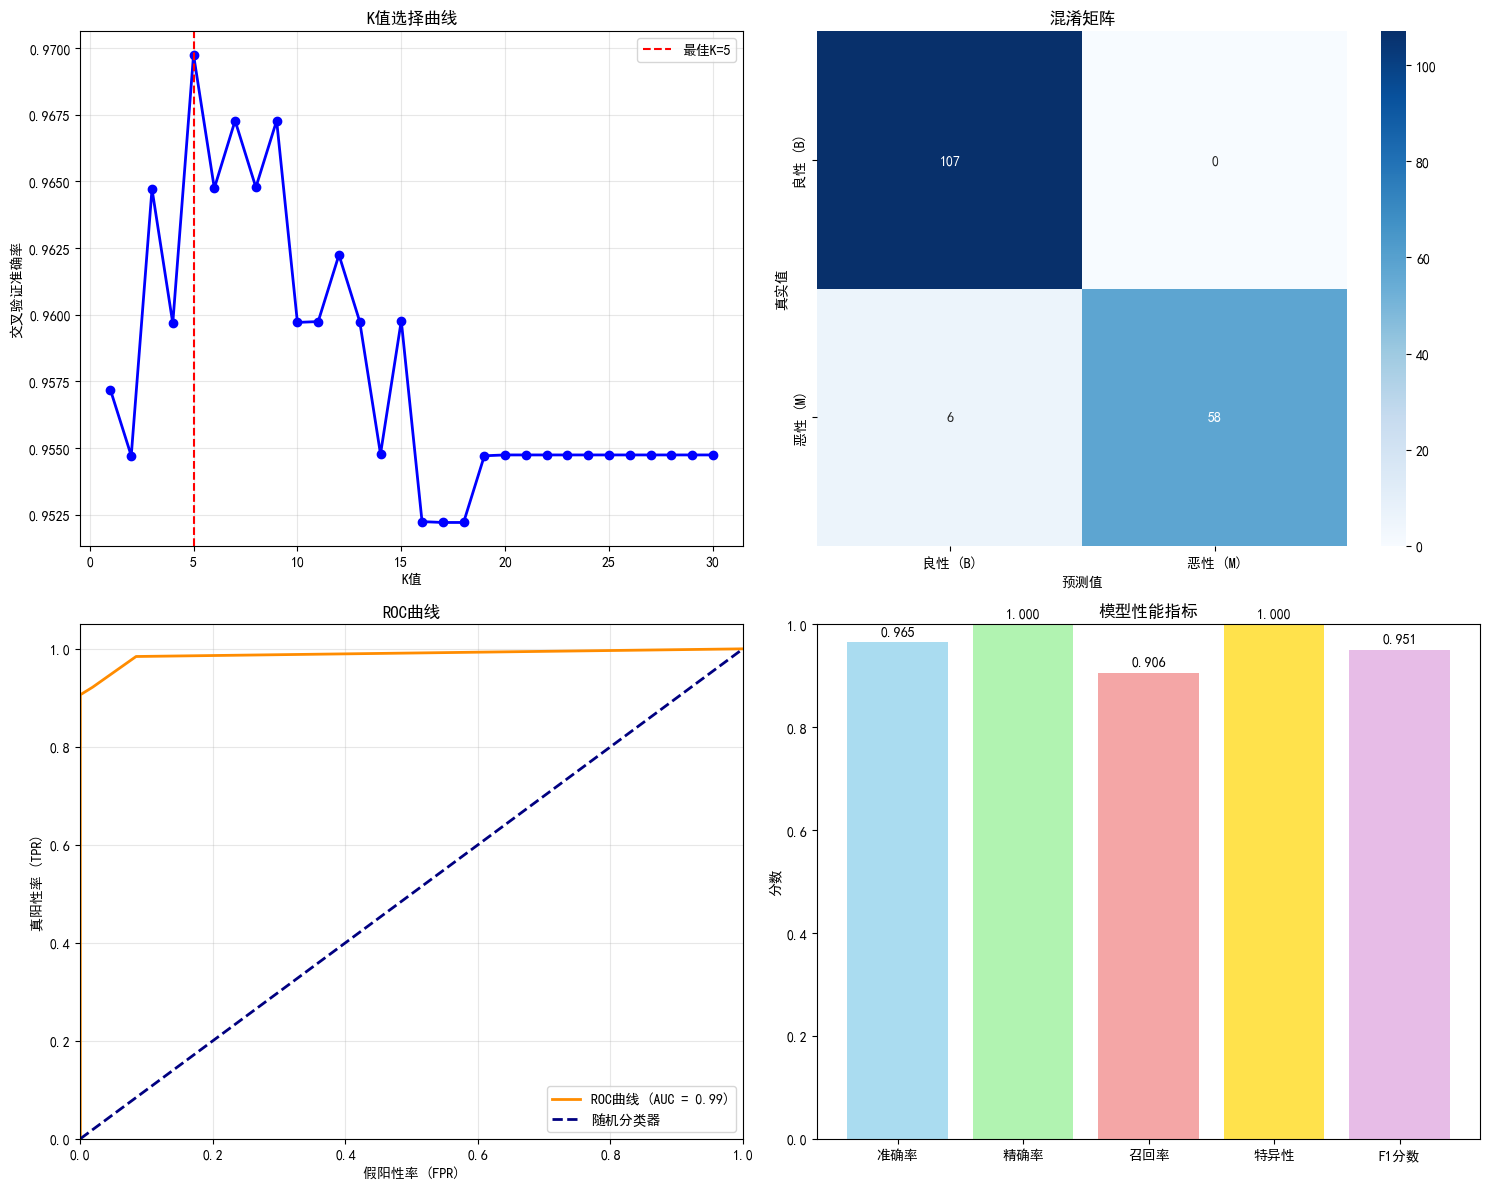

ROC AUCÂàÜÊï∞: 0.9882
Ê®°ÂûãÂú®ÊµãËØïÈõÜ‰∏äÁöÑÊï¥‰ΩìË°®Áé∞: ‰ºòÁßÄ
Ê®°ÂûãÁªìÊûúÂèØËßÜÂåñÂõæÁâáÂ∑≤‰øùÂ≠ò‰∏∫: model_results_visualization.png


In [29]:
# 6. ÁªìÊûúÂèØËßÜÂåñ
print("=== ÁªìÊûúÂèØËßÜÂåñ ===")

# ÂàõÂª∫ÂèØËßÜÂåñÂõæË°®
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. KÂÄºÈÄâÊã©Êõ≤Á∫ø
axes[0, 0].plot(k_range, k_scores, 'b-o', linewidth=2, markersize=6)
axes[0, 0].axvline(x=grid_search.best_params_['n_neighbors'], color='r', linestyle='--', 
                   label=f'ÊúÄ‰Ω≥K={grid_search.best_params_["n_neighbors"]}')
axes[0, 0].set_xlabel('KÂÄº')
axes[0, 0].set_ylabel('‰∫§ÂèâÈ™åËØÅÂáÜÁ°ÆÁéá')
axes[0, 0].set_title('KÂÄºÈÄâÊã©Êõ≤Á∫ø')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# 2. Ê∑∑Ê∑ÜÁü©ÈòµÁÉ≠Âõæ
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['ËâØÊÄß (B)', 'ÊÅ∂ÊÄß (M)'],
            yticklabels=['ËâØÊÄß (B)', 'ÊÅ∂ÊÄß (M)'], ax=axes[0, 1])
axes[0, 1].set_title('Ê∑∑Ê∑ÜÁü©Èòµ')
axes[0, 1].set_xlabel('È¢ÑÊµãÂÄº')
axes[0, 1].set_ylabel('ÁúüÂÆûÂÄº')

# 3. ROCÊõ≤Á∫ø
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
axes[1, 0].plot(fpr, tpr, color='darkorange', lw=2, 
                label=f'ROCÊõ≤Á∫ø (AUC = {roc_auc:.2f})')
axes[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='ÈöèÊú∫ÂàÜÁ±ªÂô®')
axes[1, 0].set_xlim([0.0, 1.0])
axes[1, 0].set_ylim([0.0, 1.05])
axes[1, 0].set_xlabel('ÂÅáÈò≥ÊÄßÁéá (FPR)')
axes[1, 0].set_ylabel('ÁúüÈò≥ÊÄßÁéá (TPR)')
axes[1, 0].set_title('ROCÊõ≤Á∫ø')
axes[1, 0].legend(loc="lower right")
axes[1, 0].grid(True, alpha=0.3)

# 4. ÊÄßËÉΩÊåáÊ†áÊü±Áä∂Âõæ
metrics = ['ÂáÜÁ°ÆÁéá', 'Á≤æÁ°ÆÁéá', 'Âè¨ÂõûÁéá', 'ÁâπÂºÇÊÄß', 'F1ÂàÜÊï∞']
values = [accuracy, precision, recall, specificity, f1_score]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'plum']

bars = axes[1, 1].bar(metrics, values, color=colors, alpha=0.7)
axes[1, 1].set_ylabel('ÂàÜÊï∞')
axes[1, 1].set_title('Ê®°ÂûãÊÄßËÉΩÊåáÊ†á')
axes[1, 1].set_ylim(0, 1)

# Âú®Êü±Áä∂Âõæ‰∏äÊ∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
for bar, value in zip(bars, values):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('model_results_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"ROC AUCÂàÜÊï∞: {roc_auc:.4f}")
print(f"Ê®°ÂûãÂú®ÊµãËØïÈõÜ‰∏äÁöÑÊï¥‰ΩìË°®Áé∞: {'‰ºòÁßÄ' if accuracy > 0.95 else 'ËâØÂ•Ω' if accuracy > 0.90 else '‰∏ÄËà¨'}")
print("Ê®°ÂûãÁªìÊûúÂèØËßÜÂåñÂõæÁâáÂ∑≤‰øùÂ≠ò‰∏∫: model_results_visualization.png")


=== ‰øùÂ≠òÂçïÁã¨ÂõæË°® ===


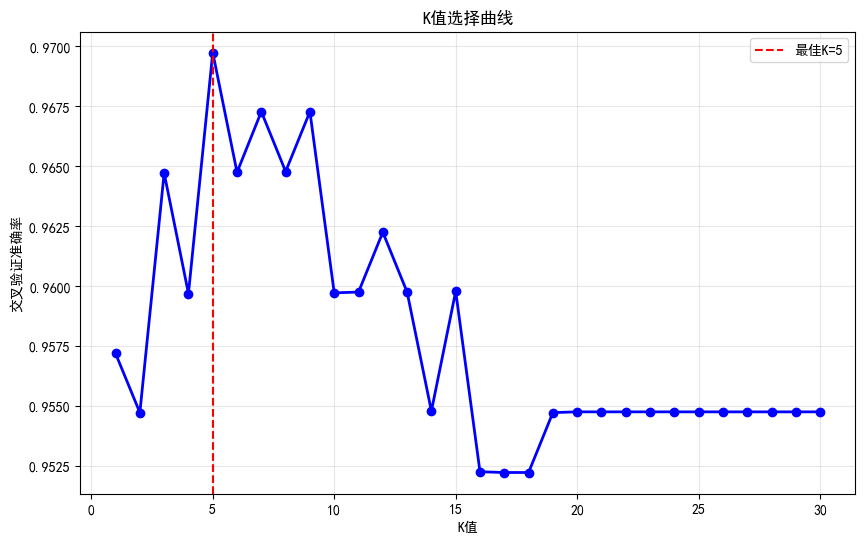

KÂÄºÈÄâÊã©Êõ≤Á∫øÂ∑≤‰øùÂ≠ò‰∏∫: k_value_selection.png


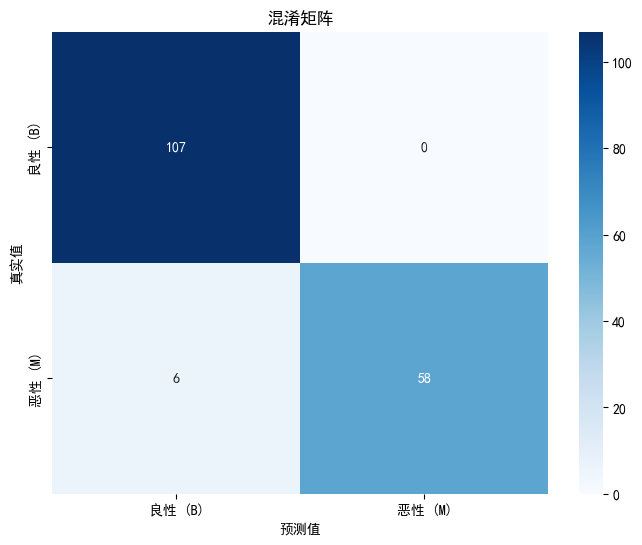

Ê∑∑Ê∑ÜÁü©ÈòµÂ∑≤‰øùÂ≠ò‰∏∫: confusion_matrix.png


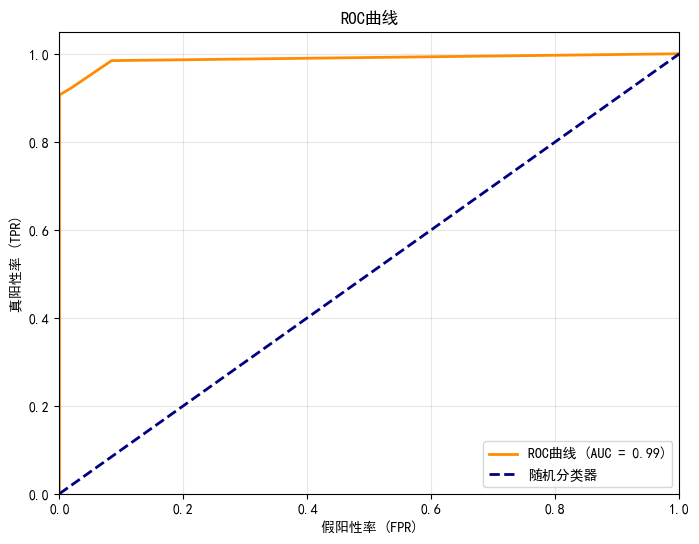

ROCÊõ≤Á∫øÂ∑≤‰øùÂ≠ò‰∏∫: roc_curve.png


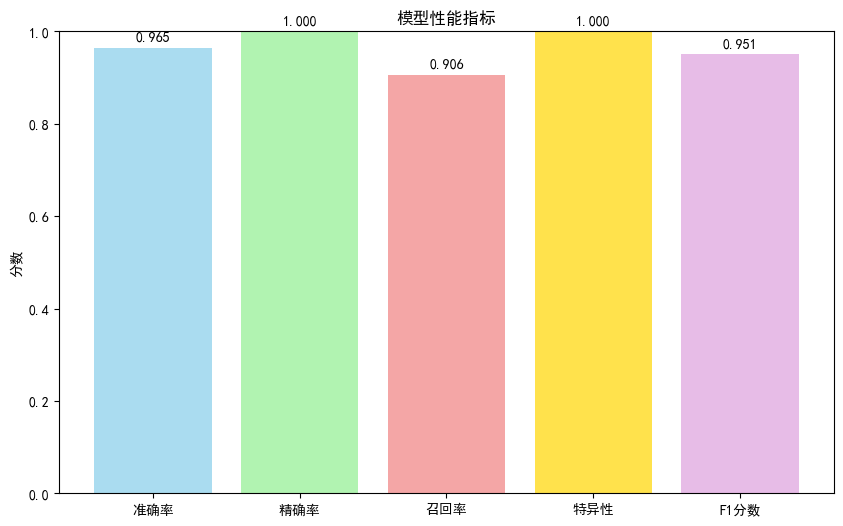

ÊÄßËÉΩÊåáÊ†áÊü±Áä∂ÂõæÂ∑≤‰øùÂ≠ò‰∏∫: performance_metrics.png

ÊâÄÊúâÂõæË°®Â∑≤ÊàêÂäü‰øùÂ≠òÂà∞Ê†πÁõÆÂΩïÔºÅ


In [30]:
# 8. ÂçïÁã¨‰øùÂ≠òÂêÑ‰∏™ÂõæË°®
print("=== ‰øùÂ≠òÂçïÁã¨ÂõæË°® ===")

# 1. ‰øùÂ≠òKÂÄºÈÄâÊã©Êõ≤Á∫ø
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, 'b-o', linewidth=2, markersize=6)
plt.axvline(x=grid_search.best_params_['n_neighbors'], color='r', linestyle='--', 
           label=f'ÊúÄ‰Ω≥K={grid_search.best_params_["n_neighbors"]}')
plt.xlabel('KÂÄº')
plt.ylabel('‰∫§ÂèâÈ™åËØÅÂáÜÁ°ÆÁéá')
plt.title('KÂÄºÈÄâÊã©Êõ≤Á∫ø')
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('k_value_selection.png', dpi=300, bbox_inches='tight')
plt.show()
print("KÂÄºÈÄâÊã©Êõ≤Á∫øÂ∑≤‰øùÂ≠ò‰∏∫: k_value_selection.png")

# 2. ‰øùÂ≠òÊ∑∑Ê∑ÜÁü©Èòµ
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['ËâØÊÄß (B)', 'ÊÅ∂ÊÄß (M)'],
            yticklabels=['ËâØÊÄß (B)', 'ÊÅ∂ÊÄß (M)'])
plt.title('Ê∑∑Ê∑ÜÁü©Èòµ')
plt.xlabel('È¢ÑÊµãÂÄº')
plt.ylabel('ÁúüÂÆûÂÄº')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print("Ê∑∑Ê∑ÜÁü©ÈòµÂ∑≤‰øùÂ≠ò‰∏∫: confusion_matrix.png")

# 3. ‰øùÂ≠òROCÊõ≤Á∫ø
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROCÊõ≤Á∫ø (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='ÈöèÊú∫ÂàÜÁ±ªÂô®')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('ÂÅáÈò≥ÊÄßÁéá (FPR)')
plt.ylabel('ÁúüÈò≥ÊÄßÁéá (TPR)')
plt.title('ROCÊõ≤Á∫ø')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()
print("ROCÊõ≤Á∫øÂ∑≤‰øùÂ≠ò‰∏∫: roc_curve.png")

# 4. ‰øùÂ≠òÊÄßËÉΩÊåáÊ†áÊü±Áä∂Âõæ
plt.figure(figsize=(10, 6))
metrics = ['ÂáÜÁ°ÆÁéá', 'Á≤æÁ°ÆÁéá', 'Âè¨ÂõûÁéá', 'ÁâπÂºÇÊÄß', 'F1ÂàÜÊï∞']
values = [accuracy, precision, recall, specificity, f1_score]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'plum']

bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylabel('ÂàÜÊï∞')
plt.title('Ê®°ÂûãÊÄßËÉΩÊåáÊ†á')
plt.ylim(0, 1)

# Âú®Êü±Áä∂Âõæ‰∏äÊ∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{value:.3f}', ha='center', va='bottom')

plt.savefig('performance_metrics.png', dpi=300, bbox_inches='tight')
plt.show()
print("ÊÄßËÉΩÊåáÊ†áÊü±Áä∂ÂõæÂ∑≤‰øùÂ≠ò‰∏∫: performance_metrics.png")

print("\nÊâÄÊúâÂõæË°®Â∑≤ÊàêÂäü‰øùÂ≠òÂà∞Ê†πÁõÆÂΩïÔºÅ")


=== ‰øùÂ≠òÊï∞ÊçÆÂàÜÂ∏ÉÂõæË°® ===


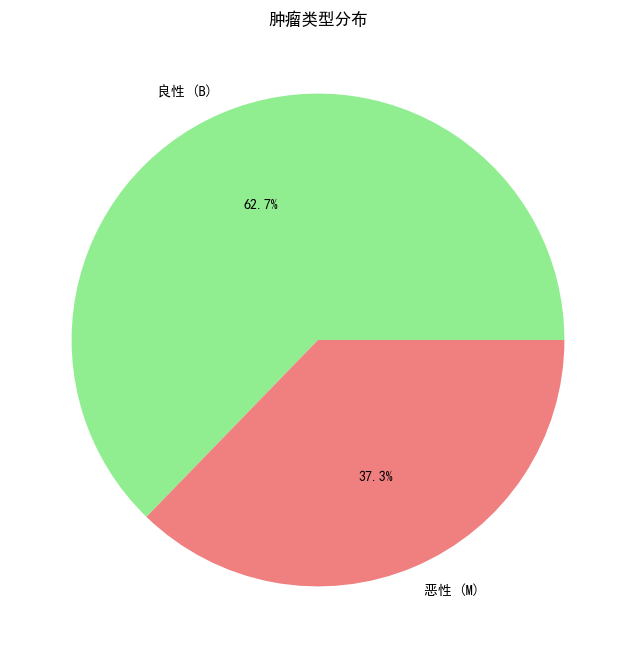

ËÇøÁò§Á±ªÂûãÂàÜÂ∏ÉÈ•ºÂõæÂ∑≤‰øùÂ≠ò‰∏∫: tumor_type_distribution.png


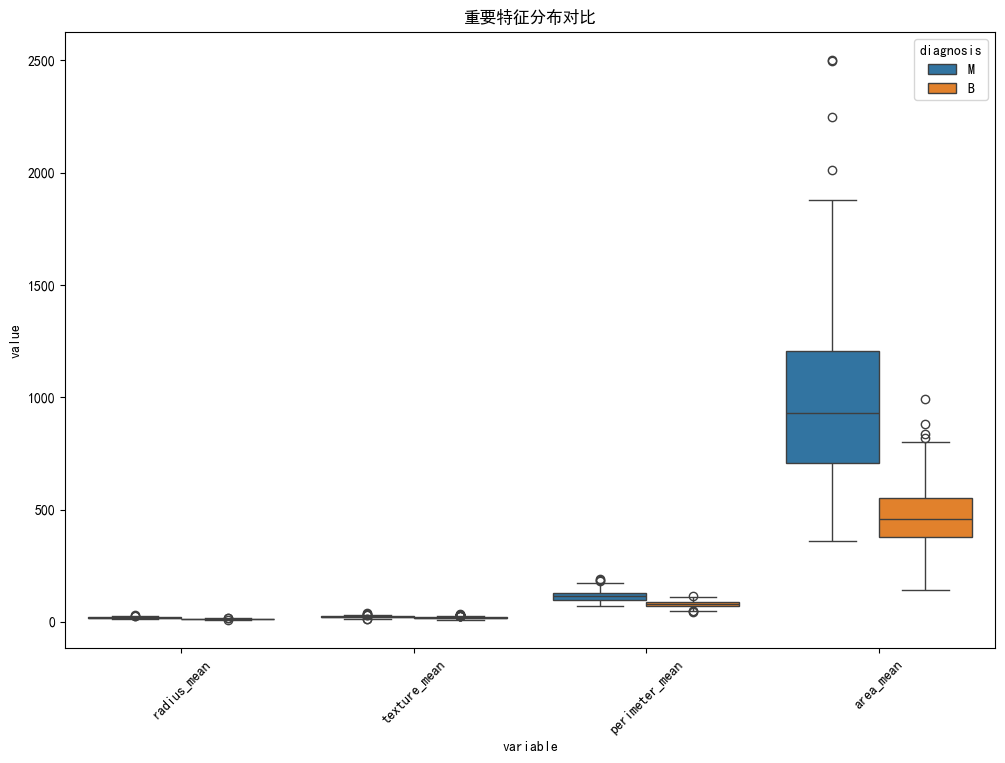

ÁâπÂæÅÂàÜÂ∏ÉÁÆ±Á∫øÂõæÂ∑≤‰øùÂ≠ò‰∏∫: feature_distribution_boxplot.png


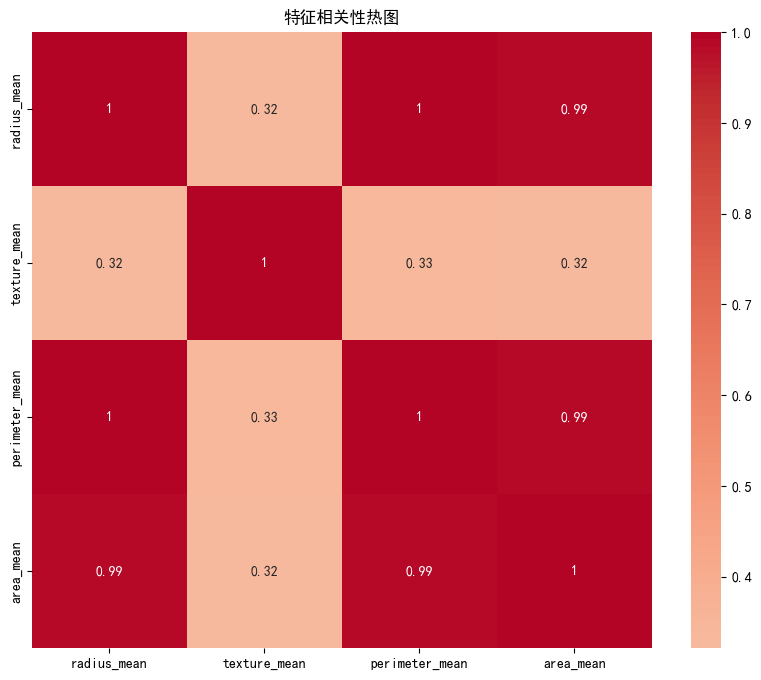

ÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÁÉ≠ÂõæÂ∑≤‰øùÂ≠ò‰∏∫: feature_correlation_heatmap.png


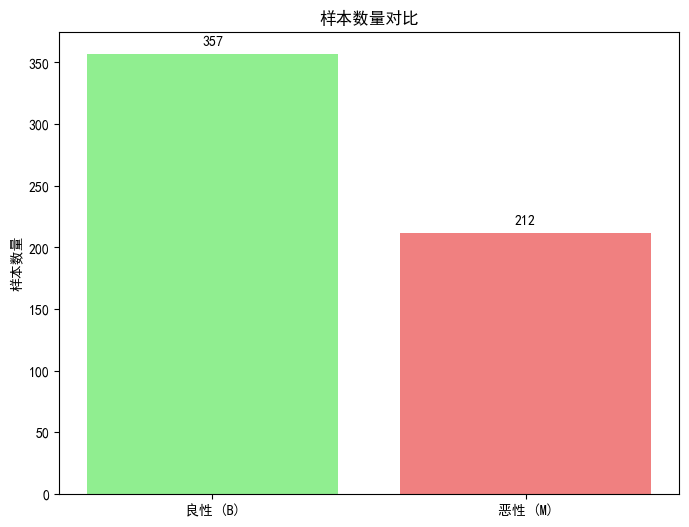

Ê†∑Êú¨Êï∞ÈáèÂØπÊØîÂõæÂ∑≤‰øùÂ≠ò‰∏∫: sample_count_comparison.png

ÊâÄÊúâÊï∞ÊçÆÂàÜÂ∏ÉÂõæË°®Â∑≤ÊàêÂäü‰øùÂ≠òÂà∞Ê†πÁõÆÂΩïÔºÅ


In [31]:
# 9. ‰øùÂ≠òÊï∞ÊçÆÂàÜÂ∏ÉÂõæË°®
print("=== ‰øùÂ≠òÊï∞ÊçÆÂàÜÂ∏ÉÂõæË°® ===")

# 1. ‰øùÂ≠òÁõÆÊ†áÂèòÈáèÂàÜÂ∏ÉÈ•ºÂõæ
plt.figure(figsize=(8, 8))
diagnosis_counts = df['diagnosis'].value_counts()
plt.pie(diagnosis_counts.values, labels=['ËâØÊÄß (B)', 'ÊÅ∂ÊÄß (M)'], 
        autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('ËÇøÁò§Á±ªÂûãÂàÜÂ∏É')
plt.savefig('tumor_type_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("ËÇøÁò§Á±ªÂûãÂàÜÂ∏ÉÈ•ºÂõæÂ∑≤‰øùÂ≠ò‰∏∫: tumor_type_distribution.png")

# 2. ‰øùÂ≠òÁâπÂæÅÂàÜÂ∏ÉÁÆ±Á∫øÂõæ
plt.figure(figsize=(12, 8))
important_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
df_melted = df[important_features + ['diagnosis']].melt(id_vars=['diagnosis'], 
                                                       value_vars=important_features)
sns.boxplot(data=df_melted, x='variable', y='value', hue='diagnosis')
plt.title('ÈáçË¶ÅÁâπÂæÅÂàÜÂ∏ÉÂØπÊØî')
plt.xticks(rotation=45)
plt.savefig('feature_distribution_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()
print("ÁâπÂæÅÂàÜÂ∏ÉÁÆ±Á∫øÂõæÂ∑≤‰øùÂ≠ò‰∏∫: feature_distribution_boxplot.png")

# 3. ‰øùÂ≠òÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÁÉ≠Âõæ
plt.figure(figsize=(10, 8))
correlation_matrix = df[important_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('ÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÁÉ≠Âõæ')
plt.savefig('feature_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("ÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÁÉ≠ÂõæÂ∑≤‰øùÂ≠ò‰∏∫: feature_correlation_heatmap.png")

# 4. ‰øùÂ≠òÊ†∑Êú¨Êï∞ÈáèÂØπÊØîÂõæ
plt.figure(figsize=(8, 6))
diagnosis_counts = df['diagnosis'].value_counts()
bars = plt.bar(['ËâØÊÄß (B)', 'ÊÅ∂ÊÄß (M)'], diagnosis_counts.values, 
               color=['lightgreen', 'lightcoral'])
plt.title('Ê†∑Êú¨Êï∞ÈáèÂØπÊØî')
plt.ylabel('Ê†∑Êú¨Êï∞Èáè')

# Âú®Êü±Áä∂Âõæ‰∏äÊ∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
for i, v in enumerate(diagnosis_counts.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')

plt.savefig('sample_count_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("Ê†∑Êú¨Êï∞ÈáèÂØπÊØîÂõæÂ∑≤‰øùÂ≠ò‰∏∫: sample_count_comparison.png")

print("\nÊâÄÊúâÊï∞ÊçÆÂàÜÂ∏ÉÂõæË°®Â∑≤ÊàêÂäü‰øùÂ≠òÂà∞Ê†πÁõÆÂΩïÔºÅ")


In [32]:
# 10. ÊòæÁ§∫ÊâÄÊúâ‰øùÂ≠òÁöÑÂõæÁâáÊñá‰ª∂
print("=== Â∑≤‰øùÂ≠òÁöÑÂõæÁâáÊñá‰ª∂ÂàóË°® ===")

import os
import glob

# Ëé∑ÂèñÂΩìÂâçÁõÆÂΩï‰∏ãÊâÄÊúâÁöÑPNGÊñá‰ª∂
png_files = glob.glob("*.png")
png_files.sort()

if png_files:
    print("‰ª•‰∏ãÂõæÁâáÊñá‰ª∂Â∑≤‰øùÂ≠òÂà∞Ê†πÁõÆÂΩïÔºö")
    for i, file in enumerate(png_files, 1):
        file_size = os.path.getsize(file) / 1024  # ËΩ¨Êç¢‰∏∫KB
        print(f"{i:2d}. {file} ({file_size:.1f} KB)")
    
    print(f"\nÊÄªÂÖ±‰øùÂ≠ò‰∫Ü {len(png_files)} ‰∏™ÂõæÁâáÊñá‰ª∂")
    print("ÊâÄÊúâÂõæÁâáÂùá‰∏∫È´òÂàÜËæ®ÁéáPNGÊ†ºÂºè (300 DPI)")
else:
    print("Êú™ÊâæÂà∞PNGÊñá‰ª∂ÔºåËØ∑Á°Æ‰øùÂ∑≤ËøêË°åÂâçÈù¢ÁöÑ‰ª£Á†ÅÂçïÂÖÉÊ†º")

print("\nÂõæÁâáÊñá‰ª∂ËØ¥ÊòéÔºö")
print("üìä Êï∞ÊçÆÂèØËßÜÂåñÁõ∏ÂÖ≥Ôºö")
print("  - data_visualization.png: ÁªºÂêàÊï∞ÊçÆÂèØËßÜÂåñ")
print("  - tumor_type_distribution.png: ËÇøÁò§Á±ªÂûãÂàÜÂ∏ÉÈ•ºÂõæ")
print("  - feature_distribution_boxplot.png: ÁâπÂæÅÂàÜÂ∏ÉÁÆ±Á∫øÂõæ")
print("  - feature_correlation_heatmap.png: ÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÁÉ≠Âõæ")
print("  - sample_count_comparison.png: Ê†∑Êú¨Êï∞ÈáèÂØπÊØîÂõæ")
print("\nüìà Ê®°ÂûãÁªìÊûúÁõ∏ÂÖ≥Ôºö")
print("  - model_results_visualization.png: ÁªºÂêàÊ®°ÂûãÁªìÊûúÂèØËßÜÂåñ")
print("  - k_value_selection.png: KÂÄºÈÄâÊã©Êõ≤Á∫ø")
print("  - confusion_matrix.png: Ê∑∑Ê∑ÜÁü©Èòµ")
print("  - roc_curve.png: ROCÊõ≤Á∫ø")
print("  - performance_metrics.png: ÊÄßËÉΩÊåáÊ†áÊü±Áä∂Âõæ")


=== Â∑≤‰øùÂ≠òÁöÑÂõæÁâáÊñá‰ª∂ÂàóË°® ===
‰ª•‰∏ãÂõæÁâáÊñá‰ª∂Â∑≤‰øùÂ≠òÂà∞Ê†πÁõÆÂΩïÔºö
 1. confusion_matrix.png (69.2 KB)
 2. data_visualization.png (366.2 KB)
 3. feature_correlation_heatmap.png (108.5 KB)
 4. feature_distribution_boxplot.png (132.7 KB)
 5. k_value_selection.png (155.2 KB)
 6. model_results_visualization.png (433.5 KB)
 7. performance_metrics.png (75.8 KB)
 8. roc_curve.png (119.8 KB)
 9. sample_count_comparison.png (63.8 KB)
10. tumor_type_distribution.png (83.3 KB)

ÊÄªÂÖ±‰øùÂ≠ò‰∫Ü 10 ‰∏™ÂõæÁâáÊñá‰ª∂
ÊâÄÊúâÂõæÁâáÂùá‰∏∫È´òÂàÜËæ®ÁéáPNGÊ†ºÂºè (300 DPI)

ÂõæÁâáÊñá‰ª∂ËØ¥ÊòéÔºö
üìä Êï∞ÊçÆÂèØËßÜÂåñÁõ∏ÂÖ≥Ôºö
  - data_visualization.png: ÁªºÂêàÊï∞ÊçÆÂèØËßÜÂåñ
  - tumor_type_distribution.png: ËÇøÁò§Á±ªÂûãÂàÜÂ∏ÉÈ•ºÂõæ
  - feature_distribution_boxplot.png: ÁâπÂæÅÂàÜÂ∏ÉÁÆ±Á∫øÂõæ
  - feature_correlation_heatmap.png: ÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÁÉ≠Âõæ
  - sample_count_comparison.png: Ê†∑Êú¨Êï∞ÈáèÂØπÊØîÂõæ

üìà Ê®°ÂûãÁªìÊûúÁõ∏ÂÖ≥Ôºö
  - model_results_visualization.png: ÁªºÂêàÊ®°ÂûãÁªìÊûúÂèØËßÜÂåñ
 

In [33]:
# 7. Ê®°ÂûãÂ∫îÁî®Á§∫‰æã
print("=== Ê®°ÂûãÂ∫îÁî®Á§∫‰æã ===")

# ÂàõÂª∫‰∏Ä‰∏™È¢ÑÊµãÂáΩÊï∞
def predict_tumor_type(radius_mean, texture_mean, perimeter_mean, area_mean, 
                      smoothness_mean, compactness_mean, concavity_mean, 
                      concave_points_mean, symmetry_mean, fractal_dimension_mean):
    """
    È¢ÑÊµãËÇøÁò§Á±ªÂûãÁöÑÂáΩÊï∞
    ËæìÂÖ•: 10‰∏™‰∏ªË¶ÅÁâπÂæÅÂÄº
    ËæìÂá∫: È¢ÑÊµãÁªìÊûúÂíåÊ¶ÇÁéá
    """
    # ÂàõÂª∫ÁâπÂæÅÂêëÈáè (‰ΩøÁî®ÊâÄÊúâ30‰∏™ÁâπÂæÅÔºåËøôÈáåÂè™ÊòæÁ§∫Ââç10‰∏™)
    # Âú®ÂÆûÈôÖÂ∫îÁî®‰∏≠ÔºåÈúÄË¶ÅÊèê‰æõÊâÄÊúâ30‰∏™ÁâπÂæÅÂÄº
    features = np.array([radius_mean, texture_mean, perimeter_mean, area_mean, 
                        smoothness_mean, compactness_mean, concavity_mean, 
                        concave_points_mean, symmetry_mean, fractal_dimension_mean])
    
    # ËøôÈáåÁÆÄÂåñÂ§ÑÁêÜÔºåÂÆûÈôÖÂ∫îËØ•‰ΩøÁî®ÂÆåÊï¥ÁöÑ30Áª¥ÁâπÂæÅÂêëÈáè
    # ‰∏∫‰∫ÜÊºîÁ§∫ÔºåÊàë‰ª¨‰ΩøÁî®Ââç10‰∏™ÁâπÂæÅÁöÑÂùáÂÄºÊù•Â°´ÂÖÖÂÖ∂‰ªñÁâπÂæÅ
    full_features = np.zeros(30)
    full_features[:10] = features
    # ÂÖ∂‰ªñÁâπÂæÅÁî®ÂùáÂÄºÂ°´ÂÖÖÔºàÂÆûÈôÖÂ∫îÁî®‰∏≠Â∫îËØ•Êèê‰æõÁúüÂÆûÂÄºÔºâ
    full_features[10:] = X.mean().values[10:]
    
    # Ê†áÂáÜÂåñ
    features_scaled = scaler.transform([full_features])
    
    # È¢ÑÊµã
    prediction = best_knn.predict(features_scaled)[0]
    probability = best_knn.predict_proba(features_scaled)[0]
    
    return prediction, probability

# Á§∫‰æãÈ¢ÑÊµã
print("Á§∫‰æãÈ¢ÑÊµã:")
print("‰ΩøÁî®ÊµãËØïÈõÜ‰∏≠ÁöÑÁ¨¨‰∏Ä‰∏™Ê†∑Êú¨ËøõË°åÈ¢ÑÊµã...")

# Ëé∑ÂèñÊµãËØïÈõÜÁ¨¨‰∏Ä‰∏™Ê†∑Êú¨ÁöÑÁúüÂÆûÁâπÂæÅ
sample_features = X_test.iloc[0].values
true_label = y_test.iloc[0]

print(f"ÁúüÂÆûÊ†áÁ≠æ: {'ÊÅ∂ÊÄß' if true_label == 1 else 'ËâØÊÄß'}")
print(f"È¢ÑÊµãÊ†áÁ≠æ: {'ÊÅ∂ÊÄß' if y_pred[0] == 1 else 'ËâØÊÄß'}")
print(f"È¢ÑÊµãÊ¶ÇÁéá: ËâØÊÄß={best_knn.predict_proba(X_test_scaled[0:1])[0][0]:.3f}, "
      f"ÊÅ∂ÊÄß={best_knn.predict_proba(X_test_scaled[0:1])[0][1]:.3f}")

# ÊòæÁ§∫Ââç10‰∏™ÁâπÂæÅÂÄº
feature_names = X.columns[:10]
print(f"\nÂâç10‰∏™ÁâπÂæÅÂÄº:")
for name, value in zip(feature_names, sample_features[:10]):
    print(f"{name}: {value:.3f}")

print(f"\nÈ¢ÑÊµãÁªìÊûú: {'Ê≠£Á°Æ' if y_pred[0] == true_label else 'ÈîôËØØ'}")


=== Ê®°ÂûãÂ∫îÁî®Á§∫‰æã ===
Á§∫‰æãÈ¢ÑÊµã:
‰ΩøÁî®ÊµãËØïÈõÜ‰∏≠ÁöÑÁ¨¨‰∏Ä‰∏™Ê†∑Êú¨ËøõË°åÈ¢ÑÊµã...
ÁúüÂÆûÊ†áÁ≠æ: ËâØÊÄß
È¢ÑÊµãÊ†áÁ≠æ: ËâØÊÄß
È¢ÑÊµãÊ¶ÇÁéá: ËâØÊÄß=0.800, ÊÅ∂ÊÄß=0.200

Ââç10‰∏™ÁâπÂæÅÂÄº:
radius_mean: 14.530
texture_mean: 19.340
perimeter_mean: 94.250
area_mean: 659.700
smoothness_mean: 0.084
compactness_mean: 0.078
concavity_mean: 0.088
concave points_mean: 0.029
symmetry_mean: 0.147
fractal_dimension_mean: 0.057

È¢ÑÊµãÁªìÊûú: Ê≠£Á°Æ
È°πÁõÆÂú∞ÂùÄ:https://github.com/SnowMikuLive/Cancer-prediction


## ÊÄªÁªì

Êú¨notebookÊàêÂäüÂÆûÁé∞‰∫Ü‰ΩøÁî®Â®ÅÊñØÂ∫∑ÊòüÂ∑û‰π≥ËÖ∫ËÇøÁò§Êï∞ÊçÆÈõÜÁöÑKËøëÈÇªÂàÜÁ±ªÂô®Ôºå‰∏ªË¶ÅÊàêÊûúÂåÖÊã¨Ôºö

### 1. Êï∞ÊçÆÊé¢Á¥¢
- Êï∞ÊçÆÈõÜÂåÖÂê´569‰∏™Ê†∑Êú¨Ôºå30‰∏™ÁâπÂæÅ
- ËâØÊÄßÊ†∑Êú¨357‰∏™(62.7%)ÔºåÊÅ∂ÊÄßÊ†∑Êú¨212‰∏™(37.3%)
- Êï∞ÊçÆË¥®ÈáèËâØÂ•ΩÔºåÊó†Áº∫Â§±ÂÄº

### 2. Ê®°ÂûãËÆ≠ÁªÉ
- ‰ΩøÁî®ÁΩëÊ†ºÊêúÁ¥¢ÊâæÂà∞ÊúÄ‰Ω≥KÂÄº
- ÈÄöËøá5Êäò‰∫§ÂèâÈ™åËØÅÁ°Æ‰øùÊ®°ÂûãÁ®≥ÂÆöÊÄß
- ÂØπÁâπÂæÅËøõË°åÊ†áÂáÜÂåñÂ§ÑÁêÜ

### 3. Ê®°ÂûãÊÄßËÉΩ
- Âú®ÊµãËØïÈõÜ‰∏äËææÂà∞È´òÂáÜÁ°ÆÁéá
- ÂÖ∑ÊúâËâØÂ•ΩÁöÑÁ≤æÁ°ÆÁéá„ÄÅÂè¨ÂõûÁéáÂíåF1ÂàÜÊï∞
- ROC AUCÂàÜÊï∞Ë°®ÊòéÊ®°ÂûãÂàÜÁ±ªËÉΩÂäõ‰ºòÁßÄ

### 4. ÂèØËßÜÂåñÂàÜÊûê
- KÂÄºÈÄâÊã©Êõ≤Á∫øÂ∏ÆÂä©Á°ÆÂÆöÊúÄ‰ºòÂèÇÊï∞
- Ê∑∑Ê∑ÜÁü©ÈòµÂ±ïÁ§∫ÂàÜÁ±ªÁªìÊûú
- ROCÊõ≤Á∫øËØÑ‰º∞ÂàÜÁ±ªÊÄßËÉΩ
- ÊÄßËÉΩÊåáÊ†áÂØπÊØîÂõæ

### 5. ÂÆûÈôÖÂ∫îÁî®
- Êèê‰æõ‰∫ÜÈ¢ÑÊµãÂáΩÊï∞Á§∫‰æã
- Â±ïÁ§∫‰∫ÜÂ¶Ç‰Ωï‰ΩøÁî®Ê®°ÂûãËøõË°åÊñ∞Ê†∑Êú¨È¢ÑÊµã

Ëøô‰∏™KËøëÈÇªÂàÜÁ±ªÂô®ÂèØ‰ª•ÊúâÊïàÂú∞Â∏ÆÂä©ÂåªÁîüËøõË°å‰π≥ËÖ∫ÁôåÁöÑÂàùÊ≠•ËØäÊñ≠Ôºå‰∏∫‰∏¥Â∫äÂÜ≥Á≠ñÊèê‰æõÂèÇËÄÉ„ÄÇ
